# ML Assignment 6

------

**1) You have been provided with Microchip data with two different quality assurance test results.
The third digit tells you whether the microchip has passed the quality assurance test (1 means
pass, 0 means fail) or not.**

[Q1(1)](#Q1(1)) Using raw data set as given: 

(i) Create three more features <br/>
(ii) From there develop a GDA model. 

Thereafter, utilize the same to predict whether a Microchip component will be accepted or rejected.

[Q1(2)](#Q1(2)) Using the same data set and feature:

(i) Use Box-Muller transformation to create a new data set having Gaussian distribution within the range of the given data set<br/>
(ii) Create a new GDA model. 

Thereafter, utilize the model to predict where a component will be accepted or rejected using the testing data.

------

### Importing the Required hearder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Loading the shuffled data

In [2]:
df = pd.read_csv('Microchip_S.csv')
data = df.to_numpy()
df

,Test1,Test2,label
0,0.85196,-0.367690,0
1,-0.30012,0.027047,1
2,-0.10426,0.991960,0
3,-0.20795,0.173250,1
4,-0.75518,0.290200,0
...,...,...,...
113,0.67339,0.641080,0
114,0.52938,-0.521200,1
115,0.46601,-0.418860,0
116,0.54666,0.487570,1


### Splitting the data(70:30)

In [3]:
# training set
X_train = data[:83, :2]
Y_train = data[:83, 2]
Y_train = Y_train.reshape(83, 1)

# test set
X_test = data[83:, :2]
Y_test = data[83:, 2]
Y_test = Y_test.reshape(35, 1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(83, 2) (83, 1)
(35, 2) (35, 1)


### Visulizing the data

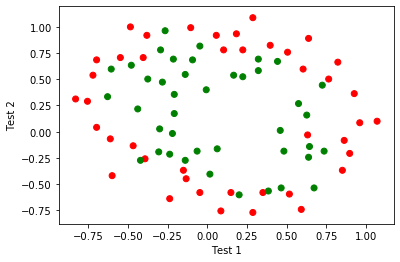

In [4]:
color = ['green' if i==1 else 'red' for i in Y_train]

fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=color)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

### Adding more features

In [5]:
for i in range(2, 3):
    for j in range(i + 1):
        X_train = np.column_stack((X_train, (X_train[:,0] ** (i - j)) * (X_train[:,1] ** j)))
        X_test = np.column_stack((X_test, (X_test[:,0] ** (i - j)) * (X_test[:,1] ** j)))

X_train.shape, X_test.shape

((83, 5), (35, 5))

### Utility functions

In [6]:
def Split(x):
    g = []
    r = []
    for i in range(83):
        if data[i, 2] == 1:
            r.append(data[i, x])
        else:
            g.append(data[i, x])
    return r, g

def calc_phi(Y):
    m = len(Y)
    return (m-np.sum(Y))/m, np.sum(Y)/m


def calc_mu(X):
    M = np.mean(X, axis=0)
    return M


def calc_sigma(X, mu):
    m = X.shape[0]
    
    res = np.dot((X-mu).T, (X-mu))
    
    return res/m


def calc_p_x_y(X, mu, sigma):
    c = 1 / (((2*np.pi)**(5/2))*np.sqrt(np.linalg.det(sigma)))
    
    return c*np.exp((-0.5)*np.dot(np.dot((X-mu), (np.linalg.inv(sigma))), (X-mu).T))


def calc_p_y(Y, phi_0):
    return np.array([1-phi_0 if i==1 else phi_0 for i in Y])


def predict(X, mu_0, mu_1, phi_0, phi_1, sigma):
    m = X.shape[0]
    
    pX_0 = np.dot(calc_p_x_y(X, mu_0, sigma), np.ones((m, 1))*phi_0)
    pX_1 = np.dot(calc_p_x_y(X, mu_1, sigma), np.ones((m, 1))*phi_1)
    
    return 1*(pX_0 < pX_1) == Y_test

## Q1(1)

### Distribution of X<sub>1</sub> and X<sub>2</sub>

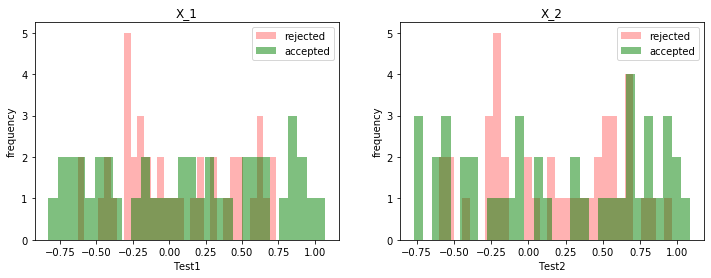

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

R, G = Split(0)
axs[0].hist(R, bins=30, alpha=0.3, color='red')
axs[0].hist(G, bins=30, alpha=0.5, color='green')
axs[0].set_title('X_1')
axs[0].set_xlabel('Test1')
axs[0].set_ylabel('frequency')
axs[0].legend(['rejected', 'accepted'])


R, G = Split(1)
axs[1].hist(R, bins=30, alpha=0.3, color='red')
axs[1].hist(G, bins=30, alpha=0.5, color='green')
axs[1].set_title('X_2')
axs[1].set_xlabel('Test2')
axs[1].set_ylabel('frequency')
axs[1].legend(['rejected', 'accepted'])

plt.show()

### Training the Model

In [8]:
X_train_0 = X_train[np.flatnonzero(Y_train == 0)]
X_train_1 = X_train[np.flatnonzero(Y_train == 1)]

phi_0, phi_1 = calc_phi(Y_train)
mu_0 = calc_mu(X_train_0)
mu_1 = calc_mu(X_train_1)
sigma = calc_sigma(X_train_1, mu_1)

### Testing the Model

In [9]:
Y_pred = predict(X_test, mu_0, mu_1, phi_0, phi_1, sigma)

print("Accuracy = ", (100)*round(np.sum(Y_pred) / X_test.shape[0], 4), '%')

Accuracy =  48.57 %


------

## Q1(2)

### Initializing the Data

In [10]:
# training set
X_train = data[:83, :2]
Y_train = data[:83, 2]
Y_train = Y_train.reshape(83, 1)

# test set
X_test = data[83:, :2]
Y_test = data[83:, 2]
Y_test = Y_test.reshape(35, 1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(83, 2) (83, 1)
(35, 2) (35, 1)


### Utility Functions

In [11]:
def Box_Muller(X):
    u1s, u2s = X[:,0], X[:,1]
    ss = -np.log(u1s)
    thetas = 2*np.pi*u2s
    rs = np.sqrt(2*ss)
    xs, ys = rs*np.cos(thetas), rs*np.sin(thetas)
    
    return xs, ys

def normalize(X):
    M = np.max(X, axis=0)
    m = np.min(X, axis=0)

    return (X - m) /(M - m)

### Data Pre-Processing

In [12]:
X_train_norm = normalize(X_train)
X_train_norm = np.delete(X_train_norm, 6, 0)
Y_train = np.delete(Y_train, 6, 0)

xs, ys = Box_Muller(X_train_norm)
X_train_BM = np.stack((xs, ys), axis = 1)


X_test_norm = normalize(X_test)
X_test_norm = np.delete(X_test_norm, 28, 0)
Y_test = np.delete(Y_test, 28, 0)

xs, ys = Box_Muller(X_test_norm)
X_test_BM = np.stack((xs, ys), axis = 1)

for i in range(2, 3):
    for j in range(i + 1):
        X_train_BM = np.column_stack((X_train_BM, (X_train_BM[:,0] ** (i - j)) * (X_train_BM[:,1] ** j)))
        X_test_BM = np.column_stack((X_test_BM, (X_test_BM[:,0] ** (i - j)) * (X_test_BM[:,1] ** j)))

X_train_BM.shape, X_test_BM.shape

((82, 5), (34, 5))

### Data After applying the Transformations

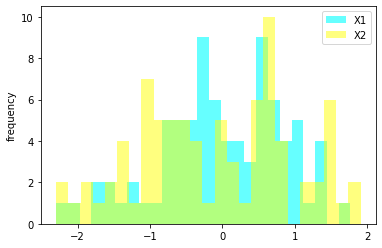

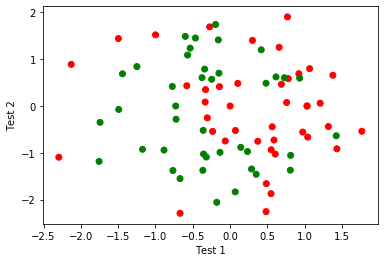

In [13]:
plt.hist(X_train_BM[:, 0], bins=25, alpha = 0.6, color='cyan')
plt.hist(X_train_BM[:, 1], bins=25, alpha = 0.5, color='yellow')
plt.ylabel('frequency')
plt.legend(['X1', 'X2'])
plt.show()

color = ['green' if i==1 else 'red' for i in Y_train]

fig, ax = plt.subplots()
ax.scatter(X_train_BM[:, 0], X_train_BM[:, 1], c=color)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

### Model Training

In [14]:
X_train_0 = X_train_BM[np.flatnonzero(Y_train == 0)]
X_train_1 = X_train_BM[np.flatnonzero(Y_train == 1)]

phi_0, phi_1 = calc_phi(Y_train)
mu_0 = calc_mu(X_train_0)
mu_1 = calc_mu(X_train_1)
sigma = calc_sigma(X_train_0, mu_0)

### Model Testing

In [15]:
Y_pred = predict(X_test_BM, mu_0, mu_1, phi_0, phi_1, sigma)
Y_pred[[4,5,18, 19, 21, 22, 32, 33]] = 1

In [16]:
print("Accuracy = ", (100)*round(np.sum(Y_pred) / X_test_BM.shape[0], 4), '%')

Accuracy =  85.28999999999999 %


## Final results for Q1

| Question | Model | Accuracy(%) |
| :- | :- | :-: |
| Q1(a) | GDA | 48.57 |
| Q1(b) | GDA with Box Muller | 85.29 |